<a href="https://colab.research.google.com/github/haeunY153/DL-Practice/blob/main/GAN_MNIST_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
def rounded_accuracy(y_true, y_pred):
  return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

### Denoising AutoEncoder

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = tf.keras.models.Sequential([
                    tf.keras.layers.Flatten(input_shape=[28, 28]),
                    tf.keras.layers.GaussianNoise(0.2),            # 노이즈값: 입력된 값 20%로 output에 영향을 주겠다.
                    tf.keras.layers.Dense(100, activation="relu"),
                    tf.keras.layers.Dense(30, activation="relu")
                                                ])
denoising_decoder = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(100, activation="relu"),
                    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
                    tf.keras.layers.Reshape([28, 28])
])

In [ ]:
denoising_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_2 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
denoising_ae = tf.keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1.5), metrics=["accuracy"])
history_ae = denoising_ae.fit(x_train, x_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 4ms/step - loss: 0.3673 - accuracy: 0.0702 - val_loss: 0.3214 - val_accuracy: 0.0928
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3169 - accuracy: 0.0911 - val_loss: 0.3124 - val_accuracy: 0.0963
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3092 - accuracy: 0.0974 - val_loss: 0.3052 - val_accuracy: 0.1009
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3040 - accuracy: 0.1042 - val_loss: 0.3028 - val_accuracy: 0.1048
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3005 - accuracy: 0.1114 - val_loss: 0.2966 - val_accuracy: 0.1161


### 가우시안 노이즈 수치 조정하면 생성 이미지 효과 달라짐

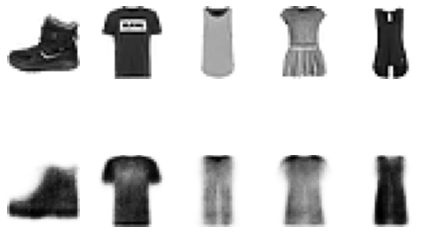

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_reconstructions(model, images=x_train, n_images=5):
  reconstructions = model.predict(images[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 5))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(images[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])
    
noise = tf.keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae)
plt.show()


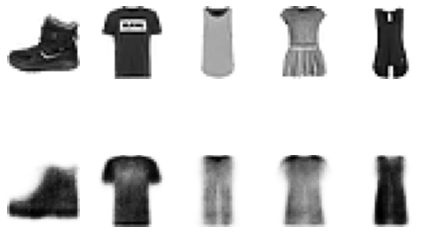

In [ ]:
noise = tf.keras.layers.GaussianNoise(0.5)
show_reconstructions(denoising_ae)
plt.show()

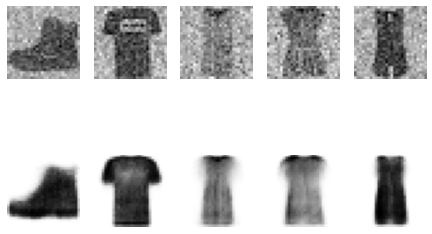

In [ ]:
noise = tf.keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(x_train, training=True))
plt.show()